# Linear Regression Fundamentals

This notebook demonstrates the core concepts of linear regression implemented from scratch, including:
- Model implementation
- Gradient descent optimization
- Visualizing the training process
- Comparing our implementation with scikit-learn

Let's begin by importing the necessary libraries and setting up our environment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler as SklearnStandardScaler
from sklearn.datasets import make_regression

# Add the parent directory to sys.path to import our custom modules
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import our implementations
from models.linear_regression import LinearRegression
from utils.preprocessing import StandardScaler
from utils.plotting import plot_learning_curve, plot_regression_results
from datasets.data_utils import generate_synthetic_data

# Set random seed for reproducibility
np.random.seed(42)

## 1. Generate Synthetic Data

We'll start by generating a synthetic dataset with a known linear relationship, plus some noise.

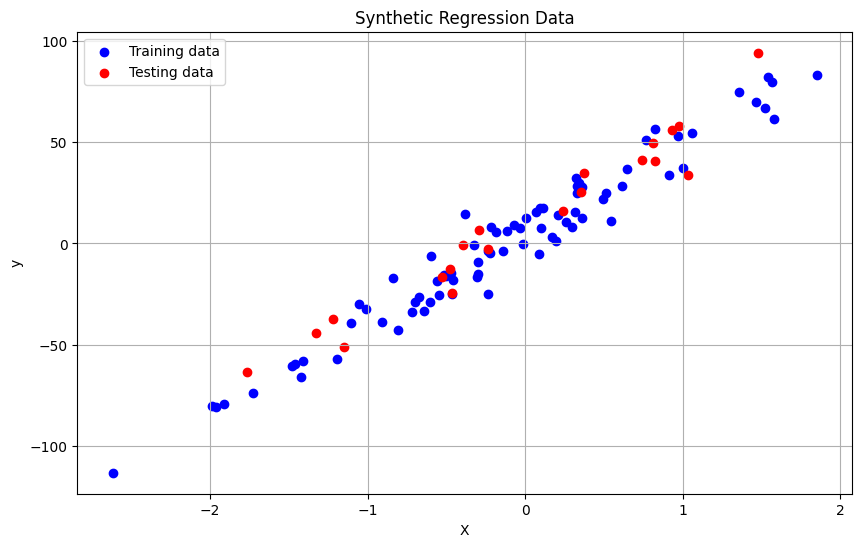

True coefficient: 41.7411
Number of training samples: 80
Number of testing samples: 20


In [3]:
# Generate synthetic data using scikit-learn's make_regression
X, y, coef = make_regression(n_samples=100, n_features=1, noise=10, 
                             coef=True, random_state=42, bias=5.0)

# Alternative: use our custom function
# X, y = generate_synthetic_data(n_samples=100, n_features=1, noise=10, function_type='linear', random_state=42)
# X is returned as a 2D array, let's flatten for easier plotting
# X = X.flatten()

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.title('Synthetic Regression Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print(f"True coefficient: {coef:.4f}")
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of testing samples: {X_test.shape[0]}")

## 2. Linear Regression from Scratch

Next, we'll use our custom implementation of linear regression to fit the data.

In [24]:
# Create and train our linear regression model
model = LinearRegression(learning_rate=0.01, max_iterations=1000)
model.fit(X_train, y_train)

# Print the learned weights
print(f"Learned weight (w): {model.weights[0]:.4f}")
print(f"Learned bias (b): {model.bias:.4f}")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = np.mean((y_pred - y_test) ** 2)
print(f"Mean Squared Error on test set: {mse:.4f}")

Learned weight (w): 44.2271
Learned bias (b): 5.0903
Mean Squared Error on test set: 104.3040


## 3. Visualizing the Learning Process

Let's visualize how the cost decreased during training.

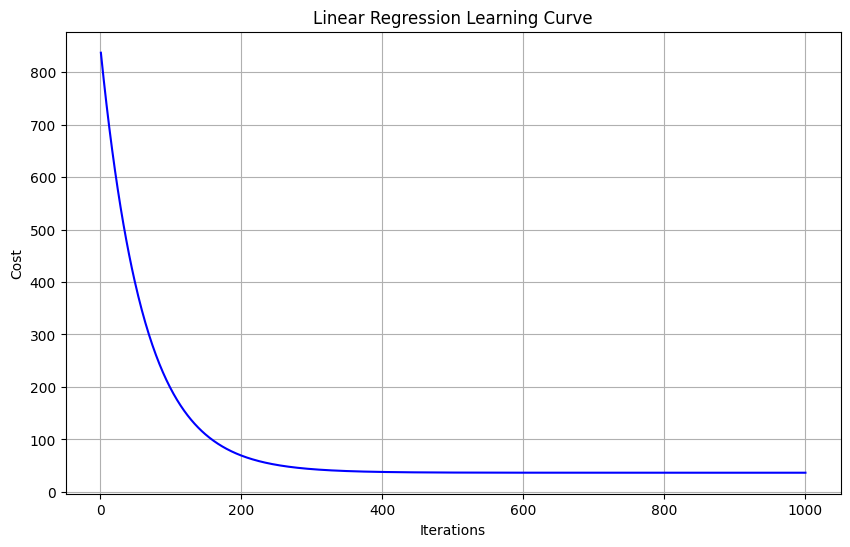

In [25]:
# Plot the learning curve
fig = plot_learning_curve(model, title="Linear Regression Learning Curve")
plt.show()

We can also visualize the learned model against the data.

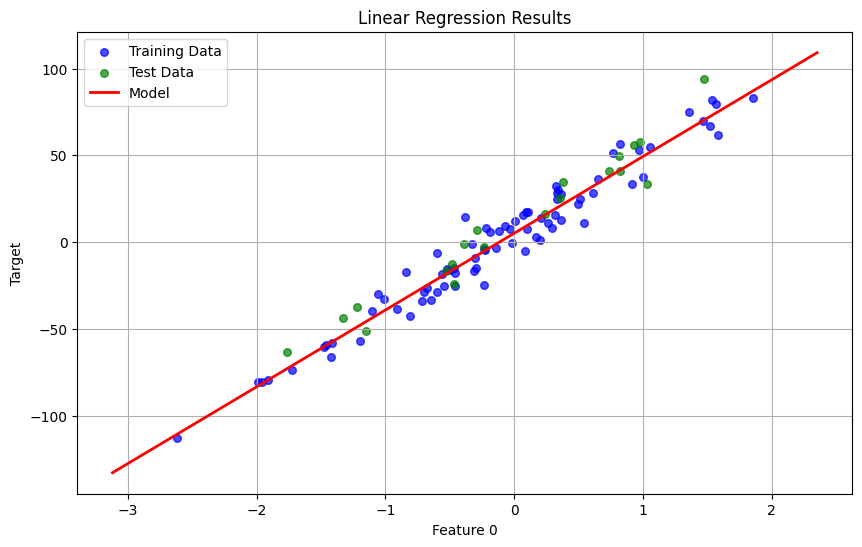

In [26]:
# Plot the regression results
fig = plot_regression_results(model, X_train, y_train, X_test, y_test, 
                             title="Linear Regression Results")
plt.show()

## 4. Comparing Learning Rates

Let's compare the effect of different learning rates on convergence.

In [ ]:
learning_rates = [0.001, 0.01, 0.1, 0.5]
plt.figure(figsize=(12, 8))

for i, lr in enumerate(learning_rates):
    model = LinearRegression(learning_rate=lr, max_iterations=1000)
    model.fit(X_train, y_train)
    
    plt.plot(range(len(model.cost_history)), model.cost_history, 
             label=f'Learning rate = {lr}')

plt.title('Effect of Learning Rate on Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()

## 5. Multiple Linear Regression

Now let's try with multiple features.

In [28]:
# Generate data with multiple features
X_multi, y_multi = make_regression(n_samples=100, n_features=5, noise=10, 
                                  random_state=42, bias=5.0)

# Split the data
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42)

# Train model
model_multi = LinearRegression(learning_rate=0.01, max_iterations=2000)
model_multi.fit(X_train_multi, y_train_multi)

# Evaluate
y_pred_multi = model_multi.predict(X_test_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)

print("Multiple Linear Regression Results:")
print(f"Number of features: {X_multi.shape[1]}")
print(f"Learned weights: {model_multi.weights}")
print(f"Learned bias: {model_multi.bias:.4f}")
print(f"Mean Squared Error: {mse_multi:.4f}")

Multiple Linear Regression Results:
Number of features: 5
Learned weights: [61.52019261 98.46956514 61.08588721 55.53764    35.97754969]
Learned bias: 5.5469
Mean Squared Error: 113.4650


## 6. Comparison with scikit-learn

Let's compare our implementation with scikit-learn's LinearRegression.

Comparison with scikit-learn:
Our model weight: 44.2433, bias: 5.0987
scikit-learn weight: 44.2442, bias: 5.0992
Our model test MSE: 104.3040
scikit-learn test MSE: 104.2022


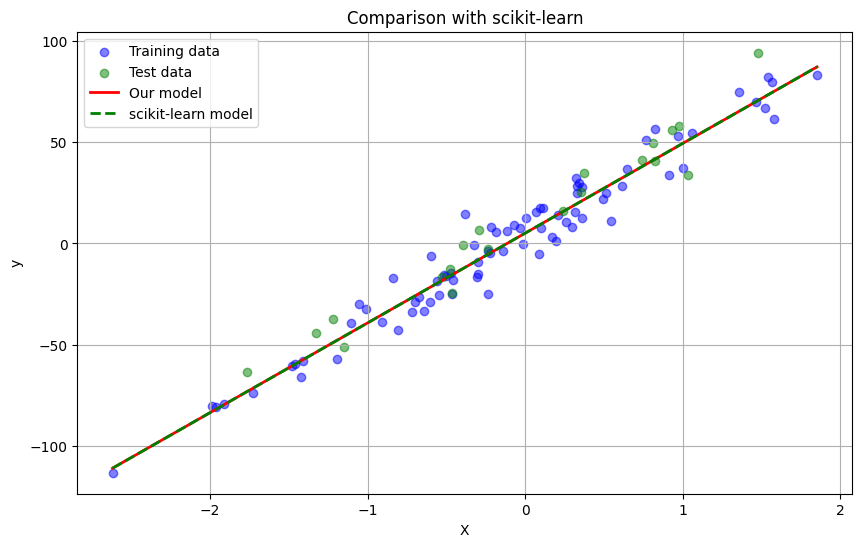

In [29]:
# Train a scikit-learn model on the original data
sklearn_model = SklearnLinearRegression()
sklearn_model.fit(X_train, y_train)

# Make predictions
sklearn_y_pred = sklearn_model.predict(X_test)
sklearn_mse = mean_squared_error(y_test, sklearn_y_pred)

# Compare results
print("Comparison with scikit-learn:")
print(f"Our model weight: {model.weights[0]:.4f}, bias: {model.bias:.4f}")
print(f"scikit-learn weight: {sklearn_model.coef_[0]:.4f}, bias: {sklearn_model.intercept_:.4f}")
print(f"Our model test MSE: {mse:.4f}")
print(f"scikit-learn test MSE: {sklearn_mse:.4f}")

# Plot both models together
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Training data')
plt.scatter(X_test, y_test, color='green', alpha=0.5, label='Test data')

# Create line for predictions
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line_our = model.predict(X_line)
y_line_sklearn = sklearn_model.predict(X_line)

plt.plot(X_line, y_line_our, 'r-', label='Our model', linewidth=2)
plt.plot(X_line, y_line_sklearn, 'g--', label='scikit-learn model', linewidth=2)

plt.title('Comparison with scikit-learn')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## 7. Understanding the Gradient Descent Algorithm

Let's visualize how gradient descent works for a simple case.

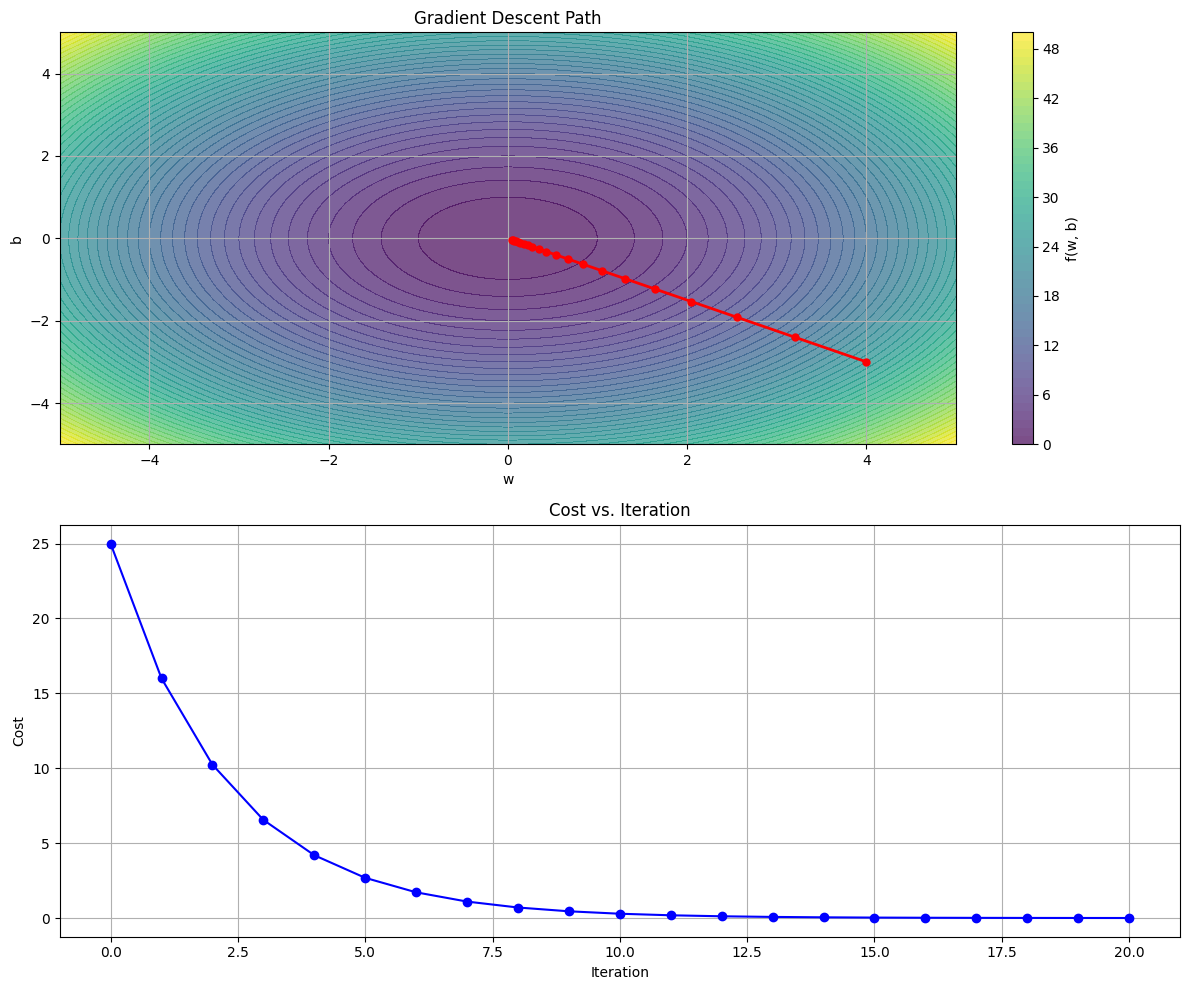

Initial point: w=4.0, b=-3.0, cost=25.0000
Final point: w=0.0461, b=-0.0346, cost=0.0033


In [30]:
# Create a simple function to illustrate gradient descent
def f(w, b):
    """A simple quadratic function: f(w, b) = w^2 + b^2"""
    return w**2 + b**2

def gradient(w, b):
    """Gradient of f: [df/dw, df/db] = [2w, 2b]"""
    return np.array([2*w, 2*b])

# Initial point
w, b = 4.0, -3.0
learning_rate = 0.1
iterations = 20

# Lists to store the trajectory
ws = [w]
bs = [b]
costs = [f(w, b)]

# Gradient descent
for i in range(iterations):
    grad = gradient(w, b)
    w -= learning_rate * grad[0]
    b -= learning_rate * grad[1]
    
    ws.append(w)
    bs.append(b)
    costs.append(f(w, b))
    
# Create a meshgrid for visualization
w_grid = np.linspace(-5, 5, 100)
b_grid = np.linspace(-5, 5, 100)
W, B = np.meshgrid(w_grid, b_grid)
Z = f(W, B)

# Plot the contour and the trajectory
plt.figure(figsize=(12, 10))

# Plot contour
plt.subplot(2, 1, 1)
plt.contourf(W, B, Z, 50, cmap='viridis', alpha=0.7)
plt.colorbar(label='f(w, b)')
plt.plot(ws, bs, 'r-o', linewidth=2, markersize=5)
plt.xlabel('w')
plt.ylabel('b')
plt.title('Gradient Descent Path')
plt.grid(True)

# Plot cost vs iteration
plt.subplot(2, 1, 2)
plt.plot(range(iterations + 1), costs, 'b-o')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Initial point: w={ws[0]}, b={bs[0]}, cost={costs[0]:.4f}")
print(f"Final point: w={ws[-1]:.4f}, b={bs[-1]:.4f}, cost={costs[-1]:.4f}")

## 8. Summary

In this notebook, we've explored:

1. How to implement linear regression from scratch using gradient descent
2. The effect of learning rate on convergence
3. How to visualize the learning process
4. Multiple linear regression with several features
5. Comparison with scikit-learn's implementation

Key takeaways:
- Gradient descent is an iterative optimization algorithm that minimizes the cost function
- The learning rate is a critical hyperparameter that affects convergence speed and stability
- Our implementation produces results very similar to scikit-learn's implementation
- Linear regression can be extended to multiple features using the same principles